In [13]:
import numpy as np 
import networkx as nx
from itertools import permutations, combinations
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix,lil_matrix, find
import pandas as pd
import seaborn as sns

## Problem 1: Suggesting Similar Papers
A citation network is a directed network where the vertices are academic papers and there is a directed edge from paper 𝐴 to paper 𝐵 if paper 𝐴 cites paper 𝐵 in its bibliography. Google Scholar performs automated citation indexing and has a useful feature that allows users to find similar papers. In the following, we analyze two approaches for measuring similarity between papers.

### Part (a): Co-citation network
- Two papers are said to be cocited if they are both cited by the same third paper. 
- The edge weights in the cocitation network correspond to the number of cocitations. 
In this part, we will discover how to compute the (weighted) adjacency matrix of the cocitation network from the adjacency matrix of the citation network.
- Problem setup: In order to derive the cocitation matrix, we need to derive it as a function of the original adjacency matrix.
- Problem notation: If there is an edge from paper 𝑖 to paper 𝑗, it means that paper 𝑖 cites paper 𝑗. We will denote by 𝐴 the corresponding adjacency matrix, such that 𝐴𝑖𝑗=1 means there is a directed edge from 𝑖 to 𝑗. Let us denote by 𝐶 the cocitation network matrix.

#### Question 1
In attempting to derive the cocitation matrix, your friend came up with the following algorithm:
- Assuming the row indices of the matrix mean that the paper is citing others, and the column indices that the paper is being cited, then the algorithm's steps would be:
    1. Construct an empty matrix for 𝐶.
    2. Go through the rows of 𝐴 one by one.
    3. For each row 𝑟 of 𝐴, if the row sum is strictly greater than 1, then do: for each pair ((𝑟,𝑎),(𝑟,𝑏)) in row 𝑟 that are non-zero (meaning that there is an existing relationship), add 1 to 𝐶 at the location (𝑎,𝑏). Note that by following this rule, you will naturally also add 1 to 𝐶 at location (𝑏,𝑎) as the pair ((𝑟,𝑏),(𝑟,𝑎)) must also be present.

After reading carefully through the proposed steps, please answer the following:

- Does this generate the cocitation weighted adjacency matrix?
    - Ans
        - Yes

- What is the big-O complexity, $\mathcal{O}$, of the proposed algorithm, in terms of 𝑛, the number of nodes in the graph?
    - Ans 
        - $\mathcal{O}(n^3)$
    
``` 
Given Adjacency matrix = A
init cocitation network matrix C = np.empty(shape=adj.shape)

For i_row in A: --> n 
    if sum(i_row, axis=0) > 1:
        extra_weight_links = combinations(where(i_row>0),2) --> n(n-1)/2 --> n^2
        for a,b in link fo link for in extra_weight_links:
            C[a,b] +=1
            C[b,a] +=1
```

#### Question 2

Write the cocitation weighted adjacency matrix, 𝐶, in terms of 𝐴 using matrix operations. Use A^T for 𝐴⊺ and * for matrix multiplication. The diagonals in your answer need not match the diagonals generated by the definition in Question 1, the off-diagonals should match Question 1.
- Ans
    - By the definition of notation
        - ''If there is an edge from paper 𝑖 to paper 𝑗, it means that paper 𝑖 cites paper 𝑗. We will denote by 𝐴 the corresponding adjacency matrix, such that 𝐴𝑖𝑗=1''
        - $A_{i,j} \in \{0,1\}$
        1. update rule in Q1
            - Condition 1, if $\sum\limits_{j=1}^{N}(A_{i,j})>0$, do
                - Condition 2, if $A_{i,a}$ > 0 and $A_{i,b}$ > 0  | $a\neq b$ and $a,b \in \{1,\ldots,N\}$, do
                    - $C_{a,b} +=1$
        2. re-think Condition 2
            - $A_{i,a}$ and $A_{i,b}$>0   -->   0<$A_{i,a} \cdot A_{i,b}$=1
            - if $A_{i,a} \cdot A_{i,b}$ = 1, do
                - $C_{a,b} += A_{i,a} \cdot A_{i,b}$
            - $C_{a,b} = \sum\limits_{i=1}^{N}(A_{i,a} \cdot A_{i,b})$
            - $C_{a,b} = col_{a}^T \cdot col_{b}$ | $a\neq b$ and $col_{a}, col_{b} \in A$
            - $\begin{align}
                C &= A^TA - (A^TA \circ I) & (X \circ Y)\text{: Hadamard product, element wise multiplication }\\
                  &= A^TA - diag( ({A^TA})_{i,i} \text{ for }i \in \{1,\ldots,N\})
                  \end{align}$
            


In [14]:
import timeit

def numpy_sq_matmul_c(A):
    return np.matmul(A.T,A)

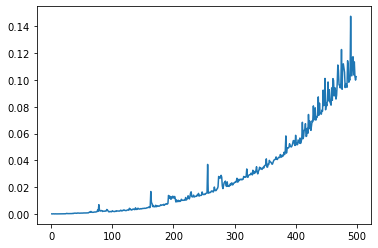

In [26]:
ts=[]
_range = range(1,500)
for n in _range:
    A=np.random.random((n,n))
    t = timeit.timeit('numpy_sq_matmul_c(A)', setup='from __main__ import numpy_sq_matmul_c,A', number=100)
    ts.append(t)
sns.lineplot(x=_range, y=ts)
plt.show()


### Part (b): Bibliographic coupling

Two papers are said to be bibliographically coupled if they cite the same other papers. The edge weights in a bibliographic coupling correspond to the number of common citations between two papers.

- How do you compute the (weighted) adjacency matrix of the bibliographic coupling, 𝐵, from the adjacency matrix of the citation network, 𝐴? Write your answer in terms of matrix operations.
    - Ans
        - $B_{a,b} = row_{a}^T \cdot row_{b}$ | $a\neq b$ and $row_{a}, row_{b} \in A$
        - $B = AA^T - (AA^T \circ I)$

### Part (c):   (2 points)  Include your answer to this question in your written report. (100 word limit.)

How does the time complexity of your solution involving matrix multiplication in part (a) compare to your friend's algorithm?
- refs
    - key words 
        - In practice, everybody uses Lapack's DGEMM.
        - DGEMM is in fact much faster (it uses blocking for instance that helps caching) than the three nested loops people learn in basic algorithm classes, but the complexity is still the same:
            - The person reference for BLAS and LAPACK is Prof. Jack Dongarra who has a nice set of slides here:
                - [Linear Algebra Algorithms](http://www.netlib.org/utk/people/JackDongarra/WEB-PAGES/SPRING-2005/Lect07.pdf)
        - Incidentally, DGEMM and BLAS in general are for dense linear algebra. For sparse matrices (like in these cases here), the complexity will better if you consider the non-zero entries. But again, in the worst-case (in which we have a dense matrix) the complexity is pretty much the same.

### Part (d):   (3 points)  Include your answer to this question in your written report. (200 word limit.)

Bibliographic coupling and cocitation can both be taken as an indicator that papers deal with related material. However, they can in practice give noticeably different results. Why? Which measure is more appropriate as an indicator for similarity between papers?

- C_a,b : paper a and paper b are pats of paper i
    - paper i = {paper a, paper b, ...}
- B_a,b : paper a and paper b both has paper i as it part
    - paper a = {paper i, ...}, paper b = {paper i, ...}

## Problem 2: Investigating a time-varying criminal network
- CAVIAR
- [Information and data description](https://learning.edx.org/course/course-v1:MITx+6.419x+1T2021/block-v1:MITx+6.419x+1T2021+type@sequential+block@networks_report/block-v1:MITx+6.419x+1T2021+type@vertical+block@networks_report-tab3)
- [paper](https://www.researchgate.net/publication/292304919_Modeling_Verdict_Outcomes_Using_Social_Network_Measures_The_Watergate_and_Caviar_Network_Cases)
- According to the police, the role of 23 of the players in the “Serero organization" are the following, listed by name (unique id):
    - Daniel Serero (n1) : Mastermind of the network.

    - Pierre Perlini (n3) : Principal lieutenant of Serero, he executes Serero's instructions.

    - Alain (n83) and Gérard (n86) Levy : Investors and transporters of money.

    - Wallace Lee (n85) : Takes care of financial affairs (accountant).

    - Gaspard Lino (n6): Broker in Spain.

    - Samir Rabbat (n11): Provider in Morocco.

    - Lee Gilbert (n88): Trusted man of Wallace Lee (became an informer after the arrest).

    - Beverly Ashton (n106): Spouse of Lino, transports money and documents.

    - Antonio Iannacci (n89): Investor.

    - Mohammed Echouafni (n84): Moroccan investor.

    - Richard Gleeson (n5), Bruno de Quinzio (n8) and Gabrielle Casale (n76) : Charged with recuperating the marijuana.

    - Roderik Janouska (n77): Individual with airport contacts.

    - Patrick Lee (n87): Investor.

    - Salvatore Panetta (n82): Transport arrangements manager.

    - Steve Cunha (n96): Transport manager, owner of a legitimate import company (became an informer after the arrest).

    - Ernesto Morales (n12): Principal organizer of the cocaine import, intermediary between the Colombians and the Serero organization.

    - Oscar Nieri (n17): The handyman of Morales.

    - Richard Brebner (n80): Was transporting the cocaine from the US to Montréal.

    - Ricardo Negrinotti (n33): Was taking possession of the cocaine in the US to hand it to Brebner.

    - Johnny Pacheco (n16): Cocaine provider.

In [3]:
import pandas as pd
import networkx as nx
phases = {}
G = {}
for i in range(1,12): 
    var_name = "phase" + str(i)
    file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
    phases[i] = pd.read_csv(file_name, index_col = ["players"])
    phases[i].columns = "n" + phases[i].columns
    phases[i].index = phases[i].columns
    G[i] = nx.from_pandas_adjacency(phases[i])
    G[i].name = var_name

### Part (a) 
#### Question 1
- What is the size of the network at each phase? Plot the evolution of the number of node and number of edges over time, from phase 1 to 11.
Provide the number of nodes and edges for the three phases listed below: [2,6,10]

In [4]:
for phase in [2,6,10]:
    print('Phase', phase)
    print('number of nodes = ', len(G[phase].nodes))
    print('number of edges = ', len(G[phase].edges))

Phase 2
number of nodes =  24
number of edges =  28
Phase 6
number of nodes =  27
number of edges =  47
Phase 10
number of nodes =  42
number of edges =  50


#### Question 2
Try visualizing the graph at each phase. For networkx you can use

```
nx.draw(g, pos=nx.drawing.nx_agraph.graphviz_layout(g), with_labels=True) 
```

where the graphviz layout algorithm graphviz_layout has been used.

The graphviz algorithm is recommended for these complex graphs, and you will need it to answer some of these questions. 

For Colab



```
!apt-get install graphviz graphviz-dev
!pip install pygraphviz
```




- Visualize the graph for Phase 3. Which of the following plots below correspond to Phase 3?
(can't install pygraphviz, move .ipynb to colab)

In [12]:
# !apt-get install graphviz graphviz-dev
# !pip install pygraphviz

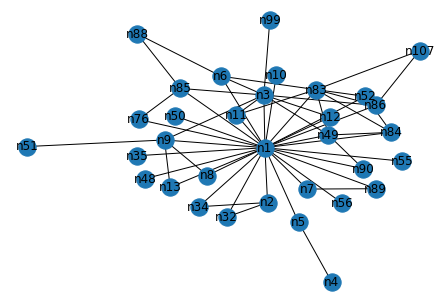

In [6]:
nx.draw(G[3], pos=nx.drawing.nx_agraph.graphviz_layout(G[3]), with_labels=True)  

### Part (b) 
#### Question 1
For each of the 11 phases and for each of the players under investigation (i.e., the 23 listed above) , compute and list the normalized degree centrality of the player.

The normalized degree centrality of node 𝑖 is defined as
$$\tilde{k} = \frac{k_i}{n-1}$$

where 𝑘𝑖 is the degree of node 𝑖 and 𝑛 is the number of nodes in the graph.

You can compute the normalized degree centrality using the networkx function 
```networkx.degree_centrality.```

- Provide the degree centrality for the following four players, at the specified phases:[3,9]

In [11]:
for phase in [3,9]:
    degree_centrality_dict = nx.degree_centrality(G[phase])
    print('Phase', phase)
    print('n1 degree_centrality', degree_centrality_dict['n1'])
    print('n3 degree_centrality', degree_centrality_dict['n3'])
    print('n12 degree_centrality', degree_centrality_dict['n12'])
    print('n83 degree_centrality', degree_centrality_dict['n83'])

Phase 3
n1 degree_centrality 0.84375
n3 degree_centrality 0.28125
n12 degree_centrality 0.0625
n83 degree_centrality 0.25
Phase 9
n1 degree_centrality 0.30303030303030304
n3 degree_centrality 0.33333333333333337
n12 degree_centrality 0.24242424242424243
n83 degree_centrality 0.030303030303030304


#### Question 2
For each of the 11 phases and for each of the players under investigation, compute and list the normalized betweenness centrality of the player.

For undirected graphs, the normalized betweenness centrality for node 𝑖 is defined as

$$\tilde{B} = \frac{2}{(n-1)(n-2)}\sum\limits_{s\neq i\neq t}\frac{n_{st}^i}{g_{st}}$$

where 𝑛𝑖𝑠𝑡 is the number of shortest paths between 𝑠 and 𝑡 that pass through 𝑖 and 𝑔𝑠𝑡 is the total number of shortest paths between 𝑠 and 𝑡. Note that this considers both orderings of each pair of nodes, so for undirected graphs, a path counts twice (as it counts both for 𝑛𝑖𝑠𝑡 and for 𝑛𝑖𝑡𝑠).

You can compute the normalized betweenness centrality using the networkx function
```
networkx.betweenness_centrality(graph, normalized = True)
```
- Provide the normalized betweenness centrality for the following four players, at the specified phases: [3,9]

In [13]:
for phase in [3,9]:
  
    betweenness_centrality_dict = nx.betweenness_centrality(G[phase], normalized = True)
    print('Phase', phase)
    print('n1 betweenness_centrality', betweenness_centrality_dict['n1'])
    print('n3 betweenness_centrality', betweenness_centrality_dict['n3'])
    print('n12 betweenness_centrality', betweenness_centrality_dict['n12'])
    print('n83 betweenness_centrality', betweenness_centrality_dict['n83'])

Phase 3
n1 betweenness_centrality 0.829502688172043
n3 betweenness_centrality 0.09549731182795697
n12 betweenness_centrality 0.0
n83 betweenness_centrality 0.046572580645161295
Phase 9
n1 betweenness_centrality 0.2490530303030303
n3 betweenness_centrality 0.5762310606060607
n12 betweenness_centrality 0.3573232323232323
n83 betweenness_centrality 0.0


#### Question 3

For each of the 11 phases and for each of the players under investigation, compute and list the eigenvector centrality of the player.

Ensure your eigenvector centrality is normalized as

$$\sqrt{\sum\limits_{i}(v_i^2)}=1$$
 
You can compute the eigenvector centrality with this normalization using the networkx function 
```
networkx.eigenvector_centrality.
```
- Provide the eigenvector centrality for the following four players, at the specified phases: [3,9]

In [16]:

for phase in [3,9]:
    eigenvector_centrality_dict = nx.eigenvector_centrality(G[phase])
    print('Phase', phase)
    print('n1 eigenvector_centrality', eigenvector_centrality_dict['n1'])
    print('n3 eigenvector_centrality', eigenvector_centrality_dict['n3'])
    print('n12 eigenvector_centrality', eigenvector_centrality_dict['n12'])
    print('n83 eigenvector_centrality', eigenvector_centrality_dict['n83'])

Phase 3
n1 eigenvector_centrality 0.5938791958045414
n3 eigenvector_centrality 0.291304887672891
n12 eigenvector_centrality 0.1359904690175954
n83 eigenvector_centrality 0.27749730090075797
Phase 9
n1 eigenvector_centrality 0.4589575176167988
n3 eigenvector_centrality 0.46798771473230655
n12 eigenvector_centrality 0.14065936326685183
n83 eigenvector_centrality 0.09178102356758049


#### Question 4
Recall the mathematical definition of each of these metrics, along with the algorithm that is best suited to compute it and the corresponding time complexity.

- Which algorithm is the fastest for this data set?
  - Degree centrality
  - Betweenness centrality
  - Eigenvector centrality

- Ans
  - Degree centrality

#### Question 5

The data from questions 1 to 3 can be used to perform different types of quantitative analyses. In this question we will look at performing one such analysis - we will determine the temporal consistency of a player's centrality , i.e. which players consistently remained active and central throughout most of the phases and which didn't?

To answer this question, look at the temporal evolution of the networks and calculate the mean centrality for each of the centrality metrics, across all phases, for every player.

Note: As every actor might not be present in every phase, attach a centrality of zero (0) to an actor for the phases in which they are not present, before calculating these statistics, so that you take a mean over all 11 phases for all actors. (Food for thought , not graded: What are the implications of this step? What else could you do to ensure that your numbers are comparable with each other?)

- For the betweenness centrality, which three players have the highest mean? (Enter an integer, eg: 1 for n1, 2 for n2, etc.)

- For the eigenvector centrality, which three players have the highest mean? (Enter an integer, eg: 1 for n1, 2 for n2, etc.)

In [72]:
allphase_eigenvector = pd.DataFrame(np.zeros((110, 11)))
allphase_eigenvector.index = np.char.add('n', np.arange(1,111).astype(str))
allphase_eigenvector.columns = np.char.add('phase', np.arange(1,12).astype(str))

allphase_betweenness = pd.DataFrame(np.zeros((110, 11)))
allphase_betweenness.index = np.char.add('n', np.arange(1,111).astype(str))
allphase_betweenness.columns = np.char.add('phase', np.arange(1,12).astype(str))


for phase in np.arange(1,12):
  
    eigenvector_centrality_dict = nx.eigenvector_centrality(G[phase])
    betweenness_centrality_dict = nx.betweenness_centrality(G[phase], normalized = True)

    for k_e,v_e in eigenvector_centrality_dict.items():
        allphase_eigenvector[f'phase{phase}'][k_e] = v_e

    for k_b,v_b in betweenness_centrality_dict.items():
        allphase_betweenness[f'phase{phase}'][k_b] = v_b


In [77]:
print(np.mean(allphase_eigenvector, axis=1).sort_values(ascending=False).head())
print(np.mean(allphase_betweenness, axis=1).sort_values(ascending=False).head())

n1     0.546391
n3     0.298095
n85    0.190612
n76    0.165877
n83    0.153522
dtype: float64
n1     0.655051
n12    0.167562
n3     0.129403
n76    0.083791
n87    0.061327
dtype: float64


### Part (c):   (2 points)  Include your answer to this question in your written report. (∼100 words, 200 word limit.)

Observe the plot you made in Part (a) Question 1. The number of nodes increases sharply over the first few phases then levels out. Comment on what you think may be causing this effect. Based on your answer, should you adjust your conclusions in Part (b) Question 5?

### Part (d):   (5 points)  Include your answer to this question in your written report. (∼300 words, 400 word limit.)

In the context of criminal networks, what would each of these metrics teach you about the importance of an actor's role in the traffic? In your own words, could you explain the limitations of degree centrality? In your opinion, which one would be most relevant to identify who is running the illegal activities of the group? Please justify.

### Part (e):   (3 points)  Include your answer to this question in your written report. (∼100 words, 200 word limit)

In real life, the police need to effectively use all the information they have gathered, to identify who is responsible for running the illegal activities of the group. Armed with a qualitative understanding of the centrality metrics from Part (d) and the quantitative analysis from part Part (b) Question 5, integrate and interpret the information you have to identify which players were most central (or important) to the operation.

Hint: Note that the definition of a player's “importance" (i.e. how central they are) can vary based on the question you are trying to answer. Begin by defining what makes a player important to the group (in your opinion) ; use your answers from Part (d) to identify which metric(s) are relevant based on your definition and then, use your quantitative analysis to identify the central and peripheral traffickers. You may also perform a different quantitative analysis, if your definition of importance requires it.

### Part (f) 
#### Question 1

Now, we will attempt to analyze the overall evolution of the network and correlate the patterns we observe to events that happened during the investigation.

The plots below visualizes the criminal network for 2 consecutive phases Phase X and X+1. Identify X using your visualization in Part (a) Question 2.
![image](https://courses.edx.org/assets/courseware/v1/ddccc2221220f2a971d45542c081fcaa/asset-v1:MITx+6.419x+1T2021+type@asset+block/images_networks_hw_evolution.svg)


- X = ?
- Ans
  - 4

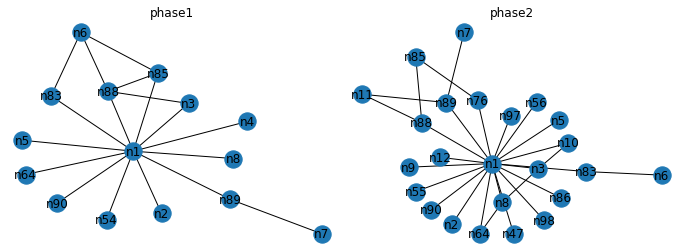

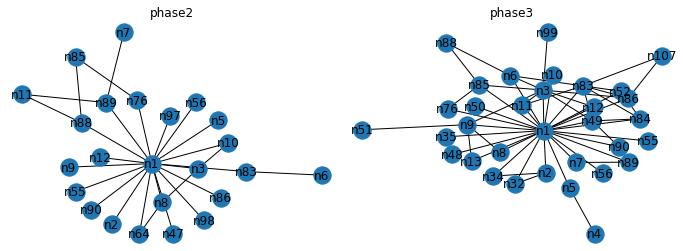

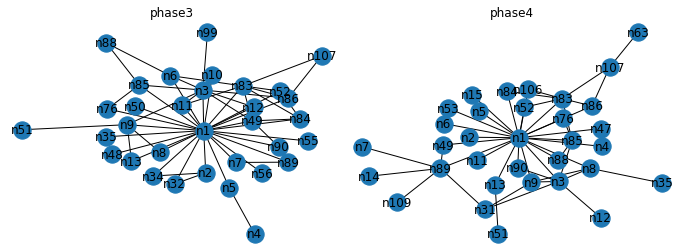

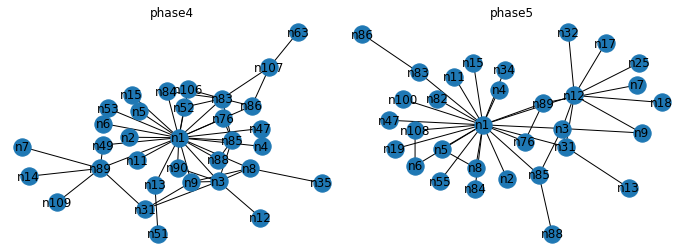

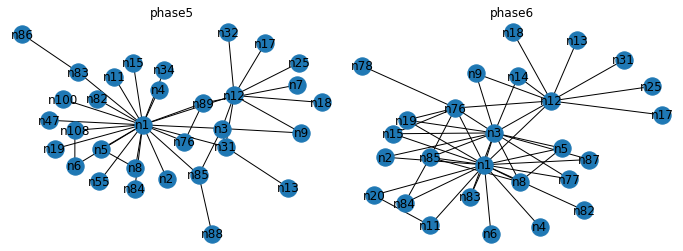

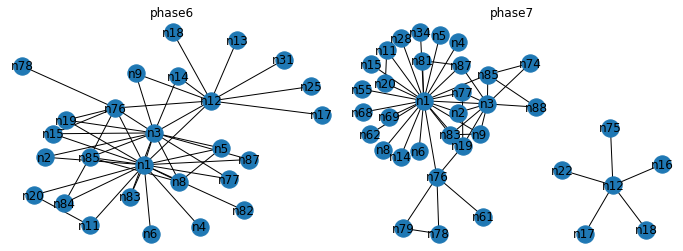

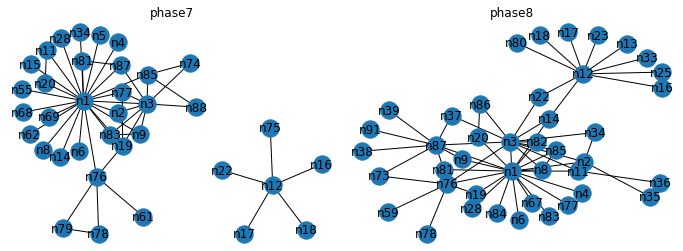

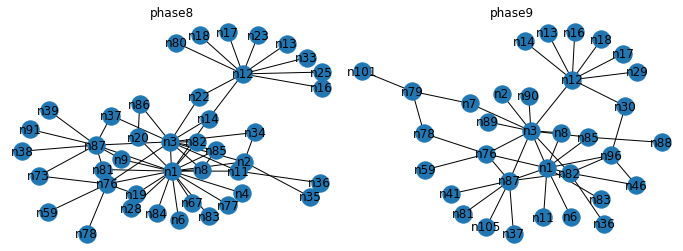

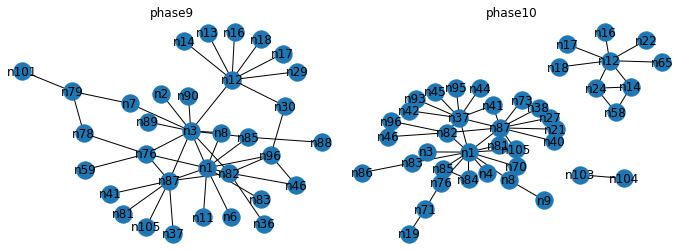

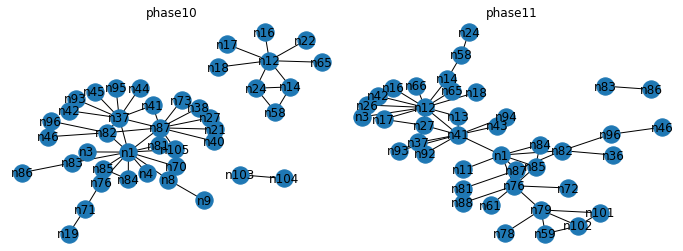

In [89]:

for phase in np.arange(1,11):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(9.6,3.6))
    ax1.set_title(f'phase{phase}')
    ax2.set_title(f'phase{phase+1}')
    nx.draw(G[phase], pos=nx.drawing.nx_agraph.graphviz_layout(G[phase]), with_labels=True, ax=ax1)
    nx.draw(G[phase+1], pos=nx.drawing.nx_agraph.graphviz_layout(G[phase+1]), with_labels=True, ax=ax2)
    fig.tight_layout()
    plt.show()

#### Question 2:   (3 points)  Include your answer to this question in your written report. (∼200 words, 300 word limit.)

The change in the network from Phase X to X+1 coincides with a major event that took place during the actual investigation. Identify the event and explain how the change in centrality rankings and visual patterns, observed in the network plots above, relates to said event.

### Part (g):   (4 points)  Include your answer to this question in your written report. (∼200 words, 300 word limit.)

While centrality helps explain the evolution of every player's role individually, we need to explore the global trends and incidents in the story in order to understand the behavior of the criminal enterprise.

Describe the coarse pattern(s) you observe as the network evolves through the phases. Does the network evolution reflect the background story?

Hint: Look at the set of actors involved at each phase, and describe how the composition of the graph is changing. Investigate when important actors seem to change roles by their movement within the hierarchy. Correlate your observations with the information that the police provided in the setup to this homework problem.

### Part (h):   (2 points)  Include your answer to this question in your written report. (∼50 words, 100 word limit.)

Are there other actors that play an important role but are not on the list of investigation (i.e., actors who are not among the 23 listed above) ? List them, and explain why they are important.

***The remaining two questions will concern the directed graphs derived from the CAVIAR data.***

### Part (i):   (2 points)  Include your answer to this question in your written report. (∼150 words, 250 word limit.)

What are the advantages of looking at the directed version vs. undirected version of the criminal network?

Hint: If we were to study the directed version of the graph, instead of the undirected, what would you learn from comparing the in-degree and out-degree centralities of each actor? Similarly, what would you learn from the left- and right-eigenvector centralities, respectively?



### Part (j):   (4 points)  Include your answer to this question in your written report. (∼300 words, 400 word limit)

Recall the definition of hubs and authorities. Compute the hub and authority score of each actor, and for each phase. (Remember to load the adjacency data again this time using create_using = nx.DiGraph().)

With networkx you can use the nx.algorithms.link_analysis.hits function, set max_iter=1000000 for best results.

Using this, what relevant observations can you make on how the relationship between n1 and n3 evolves over the phases. Can you make comparisons to your results in Part (g)?

Optional: Also comment on what the hub and authority score can tell you about the actors you identified in Part (e).

### Optional ungraded questions.   You do not need to answer these questions; instead, consider them on your own time.

Would you consider that the particular strategy adopted by the police had an impact on the criminal network throughout the different phases of the investigation? What kind of impact?

What would have happened if the police had arrested players that they had already identified, and this at each phase? Do you think they would have managed to arrest as many players as they did in the end? If you were responsible for the criminal investigation, what would have been your strategy?

Would you say your strategy is ethical? Does it only involve the local police or does it require the help from other agents? What are the implications of your strategy in terms of international policing cooperation?

Some ethical considerations around the potential side effects of your strategy could include the following: displacement of traffic and sudden increase of criminal activity/chaos in another geographical area (locally, country-wide, or internationally), responsibility of a detective/investigator towards the unrest/chaos he/she can create in another community etc.

## Problem 3 Co-offending Network
- [Information and data description](https://learning.edx.org/course/course-v1:MITx+6.419x+1T2021/block-v1:MITx+6.419x+1T2021+type@sequential+block@networks_report/block-v1:MITx+6.419x+1T2021+type@vertical+block@networks_report-tab4)

- OffenderIdentifier   
    - Case number
- OffenderGender
    - Sex
- CrimeIdentifier
    - Event number
- CrimeType1, CrimeType2, CrimeType3, CrimeType4
    - First crime (Main), Second crime...
- Municipality
- CrimeLocation
    - Place of crime
- NumberYouthOffenders
    - Number of young persons involved
- NumberAdultOffenders
    - Number of adult persons involved
- CrimeDate
- CrimeYear

In [123]:
coof = pd.read_csv('./release_networks_homework_data/Cooffending/Cooffending.csv')
coof['NumberTotalOffenders'] = coof['NumberYouthOffenders']+coof['NumberAdultOffenders']

In [124]:
coof.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280459 entries, 0 to 1280458
Data columns (total 14 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   OffenderIdentifier    1280459 non-null  int64  
 1   OffenderGender        1280459 non-null  object 
 2   CrimeIdentifier       1280459 non-null  int64  
 3   CrimeType1            1279009 non-null  float64
 4   CrimeType2            150352 non-null   float64
 5   CrimeType3            30052 non-null    float64
 6   CrimeType4            6926 non-null     float64
 7   Municipality          1280459 non-null  int64  
 8   CrimeLocation         1140448 non-null  float64
 9   NumberYouthOffenders  1280459 non-null  int64  
 10  NumberAdultOffenders  1280459 non-null  int64  
 11  CrimeDate             1280459 non-null  object 
 12  CrimeYear             1280459 non-null  int64  
 13  NumberTotalOffenders  1280459 non-null  int64  
dtypes: float64(5), int64(7), object(2)

### Part (a)
Start by removing duplicate rows from the dataset. This can be done easily with the drop_duplicates function in the pandas library. Remember that you plan to create a graph from this dataset, so only two columns from the data set matter for this purpose. Make sure you there are no two rows with the same values specifically in these two columns.

- How many data points, or cases, does this data set have after removing duplicates?

### Part (b)

- How many unique offenders are there?

### Part (c)

- How many unique crime events are there?
- Which year has the most unique crime events? (Enter as an integer, eg: 2001 for the year 2001)
- How many unique crime events were there in this year? (The year with the most crime events.)

### Part (d) 
#### Question 1
Additional clarification (April 13): For this question, use the "Number of Youth Offenders" and "Number of Adult Offenders" columns to count the total number of offenders. (The data may be incomplete, and some of the offenders that were involved in a crime may not have entries in this dataset.)

- Which crime event involved the greatest number of offenders? (Enter the crime identifier as an integer.)

- How many offenders were involved?

- Which municipality was the crime event committed in? (Enter the municipality identifier as an integer.)

Optional: Create a table that lists the above three values for the top five crimes by number of offenders.
#### Question 2
- Which offender committed the most crimes? (Enter the offender identifier as an integer.)

In [125]:
coof = coof.drop_duplicates(subset=['OffenderIdentifier', 'CrimeIdentifier'])
print(f'{coof_sub.shape[0]} cases')
print(len(coof['OffenderIdentifier'].unique()),'unique offenders')
print(len(coof['CrimeIdentifier'].unique()),'unique crime events')
print('year', coof['CrimeYear'].value_counts().index[0])
print(coof['CrimeIdentifier'][coof['CrimeYear'] == 2008].unique().shape[0], 'unique crime events in 2008')
optional = coof.loc[:,['CrimeIdentifier', 'NumberTotalOffenders', 'Municipality']]
optional = optional.drop_duplicates().sort_values('NumberTotalOffenders', ascending=False)
print('greatest number of offenders crime event =', optional['CrimeIdentifier'].values[0])
print('greatest number of offenders involved=', optional['NumberTotalOffenders'].values[0])
print('municipality of greatest number of offenders crime event=', optional['Municipality'].values[0])
print(coof['OffenderIdentifier'].value_counts().index[0], 'committed the most crimes')
optional.head()

1279987 cases
539593 unique offenders
1164836 unique crime events
year 2008
199288 unique crime events in 2008
greatest number of offenders crime event = 27849
greatest number of offenders involved= 156
municipality of greatest number of offenders crime event= 66023
300728 committed the most crimes


CrimeIdentifier  NumberTotalOffenders  Municipality
43313             27849                   156         66023
43470            876159                   102         12072
737402           445040                    97         66023
980905            36209                    93         36033
688249           539385                    62         66023

### Part (e)
Correction note (April 13): Autograded answers have been updated to accept node counts for both original and consecutive crime and offender identifiers.

After this warm-up data exploration, build the co-offender network. You may wish to adjust the offender and crime identifiers to be consecutive integers so as to remove unnecessary nodes.

Given the size of the network, be careful regarding computational and memory constraints. Be sure to use sparse representations of the data whenever possible.

You can build a sparse matrix as follows:
```
from scipy.sparse import csr_matrix
crime_matrix = csr_matrix((vals, (row, col)), shape=(row.max() + 1, col.max() + 1))
```
- where 
    - `row` and `col` are row and column indices 
    - `vals` are the appropriate values to place at these indices (in this case, a `1` for each element).

You should then compute the cooffending matrix using matrix operations.

Then you can remove the weighting, and self loops using
```
cooffend_matrix[cooffend_matrix > 0] = 1
cooffend_matrix.setdiag(0)
cooffend_matrix.eliminate_zeros() # To avoid self loops since setdiag(0) does not itself change the sparsity pattern
```

Convert your cooffending adjacency matrix to a graph. With networkx you can do this using the `networkx.from_scipy_sparse_matrix` function.

- How made nodes are there in the graph?
- How many solo offenders are there?
- How many edges are there?


---
- 539593 unique offenders
- 1164836 unique crime events

In [126]:
coof[['OffenderIdentifier', 'CrimeIdentifier']].head()

OffenderIdentifier  CrimeIdentifier
0                   1          1085034
1                   2          1431379
2                   4           167174
3                   5          1179096
4                  17          1270690

In [128]:
# consecutive id dicts
sort_by_CrimeId  = coof[['CrimeIdentifier','OffenderIdentifier']].sort_values('CrimeIdentifier').copy()
sorted_CrimeId_u = sort_by_CrimeId['CrimeIdentifier'].unique()

CrimeId_to_conCrimeId = dict(np.vstack([sorted_CrimeId_u, np.arange(0,len(sorted_CrimeId_u))]).T)

sorted_OffenId_u = sort_by_CrimeId['OffenderIdentifier'].unique()
OffenId_to_conOffenId = dict(np.vstack([sorted_OffenId_u, np.arange(0,len(sorted_OffenId_u))]).T)
len(CrimeId_to_conCrimeId), len(OffenId_to_conOffenId)

(1164836, 539593)

In [134]:
coof['conCrimeId'] = coof['CrimeIdentifier'].map(CrimeId_to_conCrimeId)
coof['conOffenId'] = coof['OffenderIdentifier'].map(OffenId_to_conOffenId)

co_offender_network_main_df = coof[['CrimeIdentifier', 'OffenderIdentifier', 'conCrimeId', 'conOffenId']].sort_values('conCrimeId')

In [149]:
co_offender_network_main_df[co_offender_network_main_df['conCrimeId']==CrimeId_to_conCrimeId[27849]]

CrimeIdentifier  OffenderIdentifier  conCrimeId  conOffenId
163823            27849              137513       22150       16175
143917            27849              124467       22150       16176
374996            27849              255330       22150       16177
291230            27849              211704       22150       16178
255232            27849              192132       22150       16179
...                 ...                 ...         ...         ...
74342             27849               74544       22150       16325
215496            27849              169065       22150       16326
224631            27849              174801       22150       16327
116592            27849              106153       22150       16328
160346            27849              135412       22150       16329

[156 rows x 4 columns]

In [154]:
vals = np.ones(len(co_offender_network_main_df['conOffenId'].values))
offenders = co_offender_network_main_df['conOffenId'].values
crimes = co_offender_network_main_df['conCrimeId'].values
crime_matrix = csr_matrix((vals, (offenders, crimes)), shape=(offenders.max() + 1, crimes.max() + 1))

In [185]:
cooffend_matrix = crime_matrix@crime_matrix.T
cooffend_matrix[cooffend_matrix > 0] = 1
cooffend_matrix.setdiag(0)
# To avoid self loops since setdiag(0) does not itself change the sparsity pattern
cooffend_matrix.eliminate_zeros() 
g = nx.from_scipy_sparse_matrix(cooffend_matrix, create_using=nx.Graph)
degree_array = np.array(g.degree)

In [259]:
len(g.nodes), len(g.edges)

(121159, 178413)

In [260]:
# How made nodes
len(g.nodes)
print(cooffend_matrix.shape[0], 'nodes')

# How many solo offenders are there?
np.sum(np.sum(cooffend_matrix, axis=0) == 0), np.sum(degree_array[:,1]==0)
print(np.sum(degree_array[:,1]==0), 'solo offenders')

# How many edges are there?
np.sum(cooffend_matrix)/2, len(g.edges)
print(len(g.edges), 'edges')

539593 nodes
418434 solo offenders
178413 edges


### Part (f)
Now remove all isolated nodes from the graph. In networkx you can do this with 

```g.remove_nodes_from(list(nx.isolates(g)))``` 

which will remove the isolated nodes in-place (so you may want to make a copy first). Let 𝐺 be the network with all isolated nodes removed.

- What is the mean degree of 𝐺? 
    - to get a list of node degrees
        - `sorted([d for n, d in g.degree()], reverse=True)`

- For 𝐺, how many nodes have a degree of at least 100?
- How many connected components does 𝐺 have? 
    - `sorted(nx.connected_components(g), key=len, reverse=True)`



In [197]:
g.remove_nodes_from(list(nx.isolates(g)))

In [257]:
no_iso_degree_array = np.array(g.degree())
np.mean(no_iso_degree_array[:,-1]), np.sum(no_iso_degree_array[:,-1]>=100)

(2.945105192350548, 265)

In [265]:
g_connected_components = sorted(nx.connected_components(g), key=len, reverse=True)
len(g_connected_components)

36098

### Part (g):   (3 points)  Include your answer to this question in your written report. (∼50 words, 100 word limit.)

Plot the degree distribution (or an approximation of it if needed) of 𝐺. Comment on the shape of the distribution. Could this graph have come from an Erdos-Renyi model? Why might the degree distribution have this shape?

### Part (h)
Now, isolate the largest connected component of 𝐺; how many nodes does the largest connected component have?

In [266]:
connected_components_size = np.array([len(c) for c in g_connected_components])
np.max(connected_components_size)

19924

Now we will consider two ways of choosing a subgraph of the original network. Consider the network consisting of all nodes in 𝐺, but only containing the edges that correspond to pairs of offenders who co-offended together at least twice (that is, they repeatedly co-offend together). Remove all isolated nodes and call 𝐺𝑟 the remaining graph. To construct the non-repeating co-offending graph (the offenders may commit more than one crime, but never with the same person twice) 𝐺𝑛𝑟, take only edges in 𝐺 corresponding to pairs of offenders who only cooffended together exactly once, and remove the resulting isolated nodes. We will examine how these sub-networks differ.

### Part (i)
#### Question 1
- How many nodes are there in 𝐺𝑟 and 𝐺𝑛𝑟?
#### Question 2
- How many edges are there in each?
### Part (j)
- How many connected components are there in the two graphs?
- What is the average component size (number of nodes) for each graph? 
### Part (k)
- What fraction of nodes are in the largest component of each graph?


In [236]:
# repeatedly

sparse_where = find(crime_matrix@crime_matrix.T >1)
row = sparse_where[0]
col = sparse_where[1]
vals = np.ones(len(row))

repeatedly_cooffend_matrix = csr_matrix((vals, (row, col)), shape=(row.max() + 1, col.max() + 1))
repeatedly_cooffend_matrix.setdiag(0)
# To avoid self loops since setdiag(0) does not itself change the sparsity pattern
repeatedly_cooffend_matrix.eliminate_zeros() 

g_repeatedly = nx.from_scipy_sparse_matrix(repeatedly_cooffend_matrix, create_using=nx.Graph)
g_repeatedly.remove_nodes_from(list(nx.isolates(g_repeatedly)))

In [235]:
# non-repeatedly

sparse_where = find(crime_matrix@crime_matrix.T ==1)
row = sparse_where[0]
col = sparse_where[1]
vals = np.ones(len(row))

non_repeatedly_cooffend_matrix = csr_matrix((vals, (row, col)), shape=(row.max() + 1, col.max() + 1))
non_repeatedly_cooffend_matrix.setdiag(0)
# To avoid self loops since setdiag(0) does not itself change the sparsity pattern
non_repeatedly_cooffend_matrix.eliminate_zeros() 

g_non_repeatedly = nx.from_scipy_sparse_matrix(non_repeatedly_cooffend_matrix, create_using=nx.Graph)
g_non_repeatedly.remove_nodes_from(list(nx.isolates(g_non_repeatedly)))

In [237]:
len(g_repeatedly.nodes), len(g_non_repeatedly.nodes)

(17764, 113519)

In [254]:
np.sum(repeatedly_cooffend_matrix)/2, np.sum(non_repeatedly_cooffend_matrix)/2
len(g_repeatedly.edges), len(g_non_repeatedly.edges)

(15448, 162965)

In [240]:
repeatedly_comonents = sorted(nx.connected_components(g_repeatedly), key=len, reverse=True)
non_repeatedly_comonents = sorted(nx.connected_components(g_non_repeatedly), key=len, reverse=True)
len(repeatedly_comonents), len(non_repeatedly_comonents)

(6463, 35596)

In [242]:
repeatedly_components_size = np.array([len(c) for c in repeatedly_comonents])
non_repeatedly_components_size = np.array([len(c) for c in non_repeatedly_comonents])
np.mean(repeatedly_components_size), np.mean(non_repeatedly_components_size)

(2.7485687761101656, 3.189094280256209)

In [244]:
repeatedly_components_size[0]/len(g_repeatedly.nodes),\
non_repeatedly_components_size[0]/len(g_non_repeatedly.nodes)

(0.0037153794190497636, 0.10646675886855944)

Now, isolate the largest connected component of 𝐺, 𝐺𝑟, and 𝐺𝑛𝑟; the remainder of the questions focus on this largest component.
### Part (l)
- Compute the edge density for the largest component of each of the three graphs. (In networkx you can use the `density` function, provide your answer to three significant figures, answer graded to 1% tolerance.)


In [271]:
g_sub = g.subgraph(g_connected_components[0])
g_repeatedly_sub = g_repeatedly.subgraph(repeatedly_comonents[0])
g_non_repeatedly_sub = g_non_repeatedly.subgraph(non_repeatedly_comonents[0])

In [273]:
nx.density(g_sub), nx.density(g_repeatedly_sub), nx.density(g_non_repeatedly_sub)

(0.0003556454848657796, 0.04568764568764569, 0.0007231308979893168)

In [274]:
len(g_sub.edges) / (len(g_sub.nodes)*(len(g_sub.nodes)-1)/2),\
len(g_repeatedly_sub.edges) / (len(g_repeatedly_sub.nodes)*(len(g_repeatedly_sub.nodes)-1)/2),\
len(g_non_repeatedly_sub.edges) / (len(g_non_repeatedly_sub.nodes)*(len(g_non_repeatedly_sub.nodes)-1)/2)

(0.0003556454848657796, 0.04568764568764569, 0.0007231308979893168)